In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
FOLDER_PATH = Path("/Users/odedvaalany/Developer/ITA/statistics")
AGENT_NAME = "search"

In [30]:
def calculate_statistics(df):
    """
    Given a DataFrame, calculate the base statistics for the represented data.
    """
    success = df[df["Result"] == 0]
    return {
        "success_rate": success["Result"].size / df["Result"].size,
        "fail_rate": df[df["Result"]==1]["Result"].size / df["Result"].size,
        "unknown_rate": df[df["Result"]==2]["Result"].size / df["Result"].size,
        "average_time": df["Time"].mean(),
        "average_time_success": success["Time"].mean(),
        "average_time_fail": df[df["Result"]==1]["Time"].mean(),
        "average_time_unknown": df[df["Result"]==2]["Time"].mean(),
        "max_time": success["Time"].max(),
        "min_time": success["Time"].min(),
        "average_steps": df["Num of steps"].mean(),
        "average_steps_success": success["Num of steps"].mean(),
        "average_steps_fail": df[df["Result"]==1]["Num of steps"].mean(),
        "average_steps_unknown": df[df["Result"]==2]["Num of steps"].mean(),
        "max_steps": success["Num of steps"].max(),
        "min_steps": success["Num of steps"].min(),
    }

In [31]:
import matplotlib.pyplot as plt 
for file in (FOLDER_PATH / AGENT_NAME).iterdir():
    if file.is_file() and file.name.startswith("logs_"):
        df = pd.read_csv(file)
        statistics = calculate_statistics(df)
        print(f"\nStatistics for {file.name}:")
        print("success rate",statistics["success_rate"])
        print("best time",statistics["min_time"])
        print("min steps",statistics["min_steps"])



Statistics for logs_SearchAgent_level_medium.txt:
success rate 0.389
best time 0.3283200263977051
min steps 42

Statistics for logs_SearchAgent_level_easy.txt:
success rate 0.654
best time 0.0051708221435546
min steps 10

Statistics for logs_SearchAgent_level_hard.txt:
success rate 0.172
best time 2.358168840408325
min steps 87


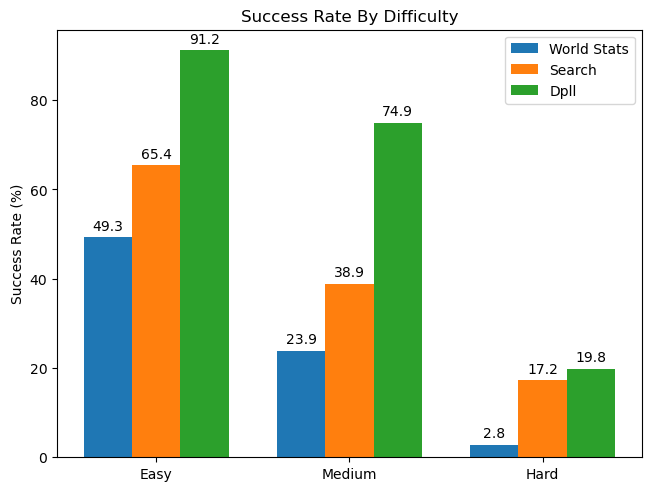

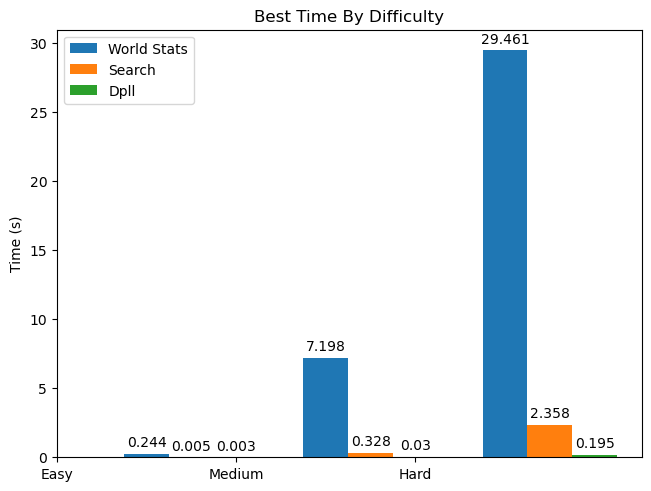

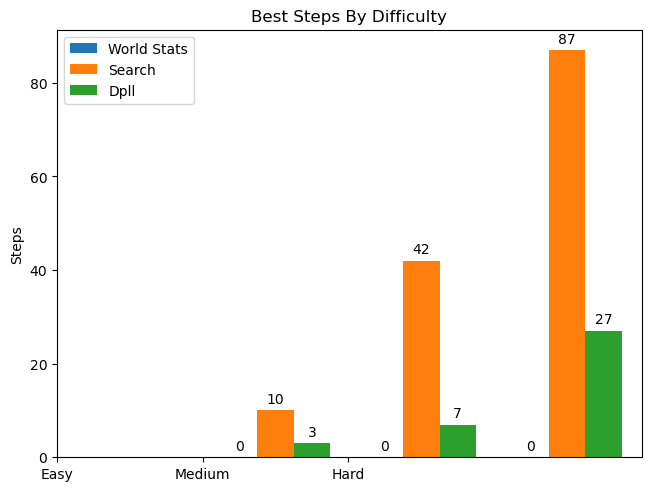

In [32]:
import matplotlib.pyplot as plt
import numpy as np
difficulties = ("Easy", "Medium", "Hard")
data = [{
    'World Stats': (49.3,23.9,2.8),
    'Search': (65.4, 38.9, 17.2),
    'Dpll': (91.2,74.9,19.8),
},
{
    'World Stats': (0.244,7.198,29.461),
    'Search': (0.005, 0.328, 2.358),
    'Dpll': (0.003,0.030,0.195),
},
{
    'World Stats': (0.0,0.0,0.0),
    'Search': (10, 42, 87),
    'Dpll': (3,7,27),
}]
titles = [
    "Success Rate By Difficulty",
    "Best Time By Difficulty",
    "Best Steps By Difficulty",
]
y_labels = [
    "Success Rate (%)",
    "Time (s)",
    "Steps",
]

x = np.arange(len(difficulties))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
for title,y_label,data in zip(titles,y_labels,data):
    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x + width, difficulties)
    ax.legend()

    plt.show()